In [1]:
#Import libraries
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  
from sklearn import tree

In [3]:
#run this cell 2 times as 1st time it gave runtime warning.
from pyAudioAnalysis import MidTermFeatures as aF

In [4]:
#Load the data
path = "D:\GitHub\music_genre_classification\music"
dirs = [path+"\\classical\\", path+"\\metal\\"] 
dirs

['D:\\GitHub\\music_genre_classification\\music\\classical\\',
 'D:\\GitHub\\music_genre_classification\\music\\metal\\']

In [5]:
#Define classes
class_names = ['classical', 'metal'] 
class_names

['classical', 'metal']

In [6]:
#initialize minimu window, minimum step, window size and step size
m_win, m_step, s_win, s_step = 1, 1, 0.1, 0.05

In [7]:
# segment-level feature extraction:
features = [] 
#Extract the features
for d in dirs: # get feature matrix for each directory (class)
    print(d)
    f, _, fn = aF.directory_feature_extraction(d, m_win, m_step, 
                                                   s_win, s_step) 
    features.append(f)

D:\GitHub\music_genre_classification\music\classical\
Analyzing file 1 of 10: D:\GitHub\music_genre_classification\music\classical\data_music_classical_classical.00012.au.wav
Analyzing file 2 of 10: D:\GitHub\music_genre_classification\music\classical\data_music_classical_classical.00017.au.wav
Analyzing file 3 of 10: D:\GitHub\music_genre_classification\music\classical\data_music_classical_classical.00023.au.wav
Analyzing file 4 of 10: D:\GitHub\music_genre_classification\music\classical\data_music_classical_classical.00027.au.wav
Analyzing file 5 of 10: D:\GitHub\music_genre_classification\music\classical\data_music_classical_classical.00030.au.wav
Analyzing file 6 of 10: D:\GitHub\music_genre_classification\music\classical\data_music_classical_classical.00040.au.wav
Analyzing file 7 of 10: D:\GitHub\music_genre_classification\music\classical\data_music_classical_classical.00048.au.wav
Analyzing file 8 of 10: D:\GitHub\music_genre_classification\music\classical\data_music_classical_c

In [8]:
len(features)

2

In [9]:
features[0].shape

(10, 138)

In [10]:
features[0]

array([[1.80389961e-01, 5.83426779e-02, 3.24215393e+00, ...,
        8.16622670e-03, 2.00000000e+02, 9.37499989e-02],
       [2.36084579e-01, 4.51324260e-02, 3.20337700e+00, ...,
        5.92134326e-03, 1.71428571e+02, 1.87499998e-01],
       [1.39812924e-01, 7.41176724e-02, 3.25051884e+00, ...,
        5.08672374e-03, 4.00000000e+02, 1.36363635e-01],
       ...,
       [1.65239444e-01, 2.48579223e-02, 3.17368998e+00, ...,
        6.63576808e-03, 2.40000000e+02, 1.37254901e-01],
       [2.52816020e-01, 3.15424944e-02, 3.04960657e+00, ...,
        2.04765510e-02, 1.50000000e+02, 2.22222220e-01],
       [2.33021540e-01, 3.46355248e-02, 3.20578801e+00, ...,
        9.23241609e-03, 2.00000000e+02, 1.39534882e-01]])

In [11]:
len(fn)

138

In [12]:
fn

['zcr_mean',
 'energy_mean',
 'energy_entropy_mean',
 'spectral_centroid_mean',
 'spectral_spread_mean',
 'spectral_entropy_mean',
 'spectral_flux_mean',
 'spectral_rolloff_mean',
 'mfcc_1_mean',
 'mfcc_2_mean',
 'mfcc_3_mean',
 'mfcc_4_mean',
 'mfcc_5_mean',
 'mfcc_6_mean',
 'mfcc_7_mean',
 'mfcc_8_mean',
 'mfcc_9_mean',
 'mfcc_10_mean',
 'mfcc_11_mean',
 'mfcc_12_mean',
 'mfcc_13_mean',
 'chroma_1_mean',
 'chroma_2_mean',
 'chroma_3_mean',
 'chroma_4_mean',
 'chroma_5_mean',
 'chroma_6_mean',
 'chroma_7_mean',
 'chroma_8_mean',
 'chroma_9_mean',
 'chroma_10_mean',
 'chroma_11_mean',
 'chroma_12_mean',
 'chroma_std_mean',
 'delta zcr_mean',
 'delta energy_mean',
 'delta energy_entropy_mean',
 'delta spectral_centroid_mean',
 'delta spectral_spread_mean',
 'delta spectral_entropy_mean',
 'delta spectral_flux_mean',
 'delta spectral_rolloff_mean',
 'delta mfcc_1_mean',
 'delta mfcc_2_mean',
 'delta mfcc_3_mean',
 'delta mfcc_4_mean',
 'delta mfcc_5_mean',
 'delta mfcc_6_mean',
 'delta m

In [13]:
X = np.concatenate((features[0], features[1]), axis = 0)
X.shape

(20, 138)

In [14]:
df = pd.DataFrame(data = X, columns = fn)
df.head()

,zcr_mean,energy_mean,energy_entropy_mean,spectral_centroid_mean,spectral_spread_mean,spectral_entropy_mean,spectral_flux_mean,spectral_rolloff_mean,mfcc_1_mean,mfcc_2_mean,...,delta chroma_6_std,delta chroma_7_std,delta chroma_8_std,delta chroma_9_std,delta chroma_10_std,delta chroma_11_std,delta chroma_12_std,delta chroma_std_std,bpm,ratio
0,0.180390,0.058343,3.242154,0.266911,0.222966,1.513042,0.003619,0.285987,-22.230259,1.794978,...,0.015081,0.006559,0.001366,0.003712,0.002799,0.011527,0.001026,0.008166,200.000000,0.093750
1,0.236085,0.045132,3.203377,0.296077,0.212635,2.079468,0.003288,0.342171,-21.738364,1.269739,...,0.004553,0.007423,0.024603,0.009285,0.006696,0.001399,0.001899,0.005921,171.428571,0.187500
2,0.139813,0.074118,3.250519,0.213665,0.217639,1.369740,0.002566,0.224539,-21.637362,2.647678,...,0.001631,0.019909,0.003435,0.007699,0.004259,0.003550,0.012377,0.005087,400.000000,0.136364
3,0.173539,0.055513,3.282597,0.203469,0.195141,1.499466,0.002425,0.329211,-22.449529,2.809373,...,0.000603,0.011263,0.001926,0.001233,0.001260,0.016588,0.003688,0.005119,200.000000,0.113636
4,0.160694,0.037572,3.260459,0.282089,0.239487,1.628624,0.004600,0.318092,-22.828334,1.662391,...,0.004972,0.009842,0.004936,0.010952,0.000636,0.006089,0.004353,0.019988,300.000000,0.088235


In [15]:
# Create Label values for the dataset
# ['classical', 'metal'] = > 0,1
z = np.zeros([10, 1], dtype = int)
o = np.ones([10, 1], dtype = int)

Y = np.concatenate((z,  o), axis = 0)
Y = Y.ravel()
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
# Preprocess the dataset, Scale it with standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Part 1   
### Featre engneering with LDA

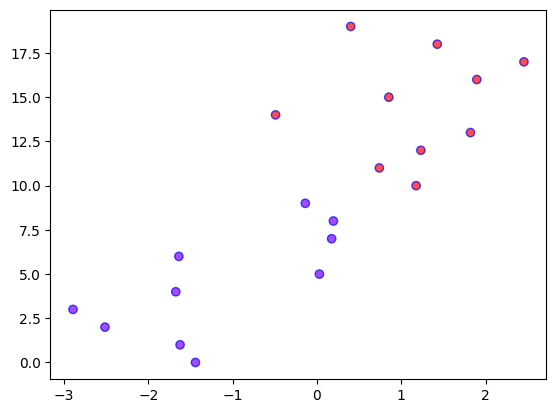

In [17]:
# apply Linear Discriminant Analysis to get 1 most important fetaure.
lda = LinearDiscriminantAnalysis(n_components=1)
x = lda.fit_transform(X, Y)


# plot the scatterplot
plt.scatter(
    x[:,0],np.arange(len(x)),c=Y,cmap='rainbow',
  alpha=0.7,edgecolors='b'
)

In [18]:
# from above lot it looks like data is linearly saperable.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.3, random_state=11)

In [20]:
# classify using Logistic classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(x)
 
# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(Y, y_pred)))
conf_m = confusion_matrix(Y, y_pred)
print(conf_m)


Accuracy : 0.95
[[10  0]
 [ 1  9]]


In [21]:
# classify using SVM classifier
classifier = SVC(kernel='sigmoid') 
classifier.fit(X_train, y_train)
y_pred = classifier.predict(x)
 
# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(Y, y_pred)))
conf_m = confusion_matrix(Y, y_pred)
print(conf_m)


Accuracy : 0.95
[[10  0]
 [ 1  9]]


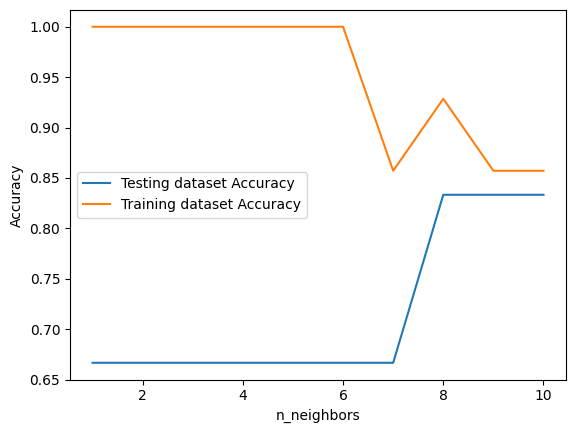

In [22]:
# Using KNN classifier
neighbors = np.arange(1, 11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [23]:
# classify using KNN classifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(x)
 
# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(Y, y_pred)))
conf_m = confusion_matrix(Y, y_pred)
print(conf_m)

Accuracy : 0.9
[[9 1]
 [1 9]]


In [24]:
# classify using random forest classifier
classifier = RandomForestClassifier(max_depth=3, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(x)
 
# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(Y, y_pred)))
conf_m = confusion_matrix(Y, y_pred)
print(conf_m)


Accuracy : 0.9
[[10  0]
 [ 2  8]]


In [25]:
# classify using naive Bayesian classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(x)
 
# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(Y, y_pred)))
conf_m = confusion_matrix(Y, y_pred)
print(conf_m)


Accuracy : 0.9
[[10  0]
 [ 2  8]]


In [26]:
# classify using Decision tree classifier
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(x)
 
# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(Y, y_pred)))
conf_m = confusion_matrix(Y, y_pred)
print(conf_m)

Accuracy : 0.9
[[10  0]
 [ 2  8]]


In [27]:
# classify using SVM classifier
classifier = SVC(kernel='linear') 
classifier.fit(X_train, y_train)
y_pred = classifier.predict(x)
 
# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(Y, y_pred)))
conf_m = confusion_matrix(Y, y_pred)
print(conf_m)


Accuracy : 0.9
[[10  0]
 [ 2  8]]


In [28]:
# classify using SVM classifier
classifier = SVC(kernel='rbf') 
classifier.fit(X_train, y_train)
y_pred = classifier.predict(x)
 
# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(Y, y_pred)))
conf_m = confusion_matrix(Y, y_pred)
print(conf_m)


Accuracy : 0.9
[[10  0]
 [ 2  8]]


In [29]:
# classify using SVM classifier
classifier = SVC(kernel='poly') 
classifier.fit(X_train, y_train)
y_pred = classifier.predict(x)
 
# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(Y, y_pred)))
conf_m = confusion_matrix(Y, y_pred)
print(conf_m)


Accuracy : 0.75
[[6 4]
 [1 9]]


In [30]:
data = {
    'LogisticRegression' : 0.95,
    'SVC sigmoid' : 0.95,
    'KNeighborsClassifier 8' : 0.9,
    'RandomForestClassifier' : 0.9,
    'DecisionTreeClassifier' : 0.9,
    'GaussianNB' : 0.9,
    'SVC linear' : 0.9,
    'SVC rbf' : 0.9,
    'SVC poly' : 0.75
}
classification = pd.DataFrame(data.items(), columns = ['algorithm', 'accuracy'])
classification

,algorithm,accuracy
0,LogisticRegression,0.95
1,SVC sigmoid,0.95
2,KNeighborsClassifier 8,0.90
3,RandomForestClassifier,0.90
4,DecisionTreeClassifier,0.90
5,GaussianNB,0.90
6,SVC linear,0.90
7,SVC rbf,0.90
8,SVC poly,0.75


# Part 2
### Featre selection with domain knowladge

In [31]:
dfs = df [['spectral_centroid_mean', 'energy_entropy_mean']]

In [32]:
dfs.head()

,spectral_centroid_mean,energy_entropy_mean
0,0.266911,3.242154
1,0.296077,3.203377
2,0.213665,3.250519
3,0.203469,3.282597
4,0.282089,3.260459


In [33]:
scs = StandardScaler()
X = sc.fit_transform(dfs.values)

In [34]:
len(X), len(Y)

(20, 20)

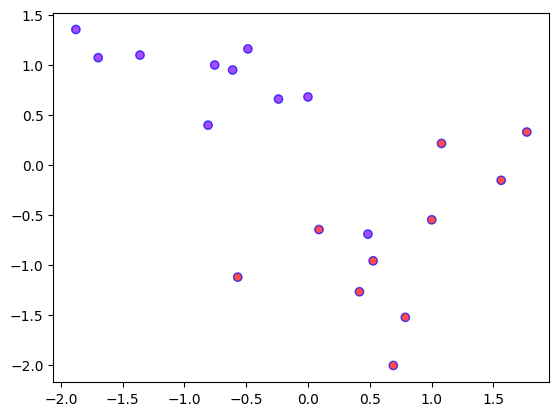

In [35]:
# plot the scatterplot
plt.scatter(
    X[:,0],X[:,1],c=Y,cmap='rainbow',
  alpha=0.7,edgecolors='b'
)

In [36]:
# from above plot data does not have a clean saperation

In [37]:
# split in train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=11)

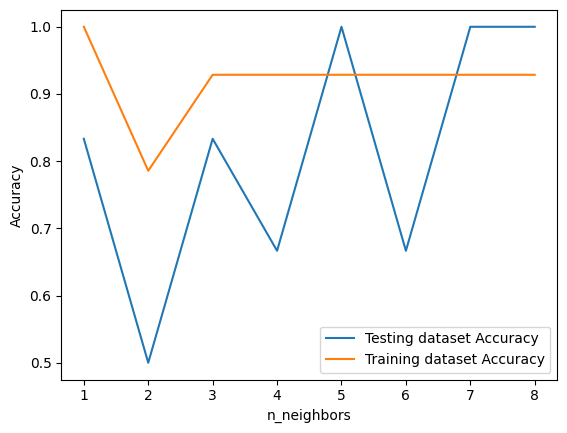

In [38]:
# Using KNN classifier
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [39]:
# from above k=7 seems a good value.

# classify using KNN classifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X)
 
# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(Y, y_pred)))
conf_m = confusion_matrix(Y, y_pred)
print(conf_m)

Accuracy : 0.95
[[ 9  1]
 [ 0 10]]


In [40]:
# from above k=8 seems a good value.

# classify using KNN classifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X)
 
# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(Y, y_pred)))
conf_m = confusion_matrix(Y, y_pred)
print(conf_m)

Accuracy : 0.95
[[ 9  1]
 [ 0 10]]


In [41]:
# classify using Logistic classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X)
 
# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(Y, y_pred)))
conf_m = confusion_matrix(Y, y_pred)
print(conf_m)


Accuracy : 0.95
[[ 9  1]
 [ 0 10]]


In [42]:
# classify using SVM classifier
classifier = SVC(kernel='sigmoid') 
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X)
 
# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(Y, y_pred)))
conf_m = confusion_matrix(Y, y_pred)
print(conf_m)


Accuracy : 0.95
[[ 9  1]
 [ 0 10]]


In [43]:
# classify using SVM classifier
classifier = SVC(kernel='linear') 
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X)
 
# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(Y, y_pred)))
conf_m = confusion_matrix(Y, y_pred)
print(conf_m)


Accuracy : 0.95
[[ 9  1]
 [ 0 10]]


In [44]:
# classify using SVM classifier
classifier = SVC(kernel='rbf') 
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X)
 
# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(Y, y_pred)))
conf_m = confusion_matrix(Y, y_pred)
print(conf_m)


Accuracy : 0.95
[[ 9  1]
 [ 0 10]]


In [45]:
# classify using SVM classifier
classifier = SVC(kernel='poly') 
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X)
 
# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(Y, y_pred)))
conf_m = confusion_matrix(Y, y_pred)
print(conf_m)


Accuracy : 0.9
[[10  0]
 [ 2  8]]


In [46]:
# classify using random forest classifier
classifier = RandomForestClassifier(max_depth=3, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X)
 
# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(Y, y_pred)))
conf_m = confusion_matrix(Y, y_pred)
print(conf_m)


Accuracy : 0.95
[[10  0]
 [ 1  9]]


In [47]:
# classify using Decision tree classifier
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X)
 
# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(Y, y_pred)))
conf_m = confusion_matrix(Y, y_pred)
print(conf_m)


Accuracy : 0.9
[[10  0]
 [ 2  8]]


In [48]:
# classify using naive Bayesian classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X)
 
# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(Y, y_pred)))
conf_m = confusion_matrix(Y, y_pred)
print(conf_m)


Accuracy : 0.95
[[ 9  1]
 [ 0 10]]


In [49]:
data_fs = {
    'LogisticRegression' : 0.95,
    'SVC sigmoid' : 0.95,
    'KNeighborsClassifier 7' : 0.95,
    'RandomForestClassifier' : 0.95,
    'DecisionTreeClassifier' : 0.90,
    'GaussianNB' : 0.95,
    'SVC linear' : 0.95,
    'SVC rbf' : 0.95,
    'SVC poly' : 0.90
}
classification_fs = pd.DataFrame(data_fs.items(), columns = ['algorithm', 'accuracy'])
classification_fs

,algorithm,accuracy
0,LogisticRegression,0.95
1,SVC sigmoid,0.95
2,KNeighborsClassifier 7,0.95
3,RandomForestClassifier,0.95
4,DecisionTreeClassifier,0.90
5,GaussianNB,0.95
6,SVC linear,0.95
7,SVC rbf,0.95
8,SVC poly,0.90
